In [1]:
import os
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
treino = pd.read_csv("content/train.csv")
teste = pd.read_csv("content/test.csv")

treino.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
teste.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [6]:
treino.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


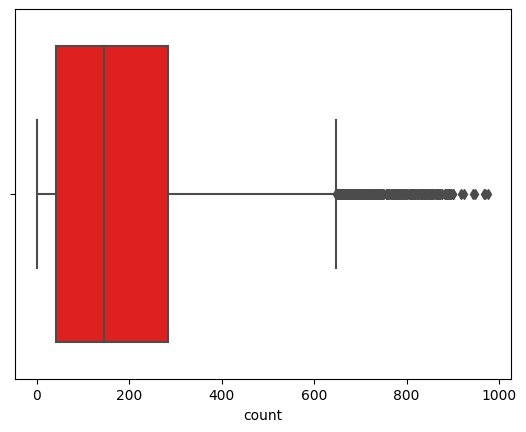

In [7]:
sns.boxplot(x = 'count', data = treino, color = 'red')
plt.show()

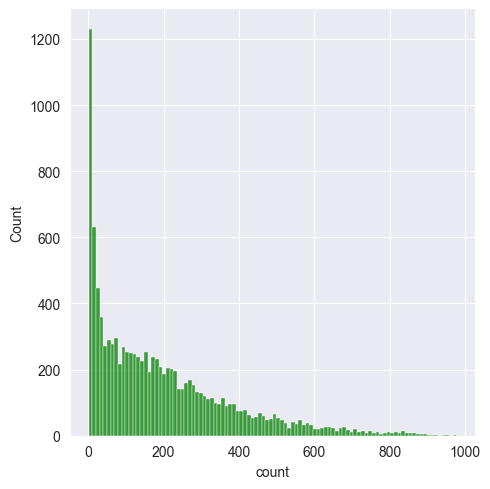

In [8]:
sns.set_style('darkgrid')
sns.displot(treino['count'], bins=100, color = 'green')
plt.show()

['temp', 'atemp', 'humidity', 'windspeed']


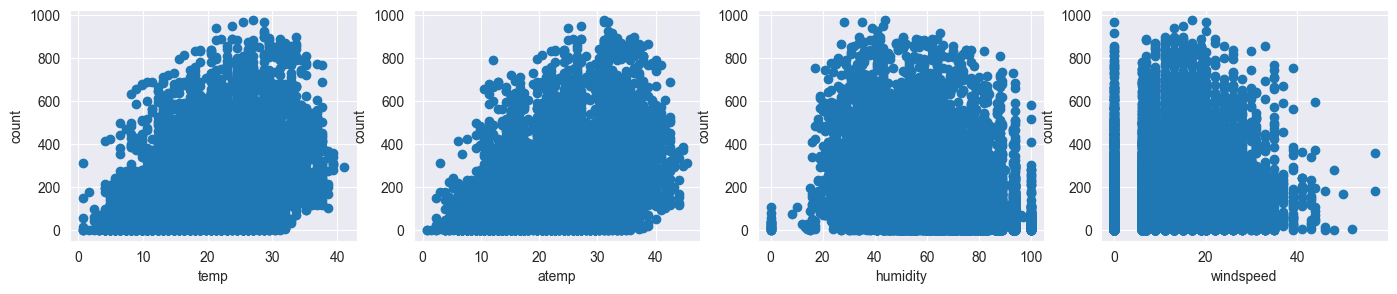

In [9]:
fields = [f for f in treino]
fields = fields[5: -3] #utiliza apenas aqueles relacionados ao clima
print(fields)

fig =plt.figure(figsize=(17,3))

for i,f in enumerate(fields):
    ax = fig.add_subplot(1,4,i+1)
    ax.scatter(treino[f], treino['count'])
    ax.set_ylabel('count')
    ax.set_xlabel(f)

plt.show()

[Text(0.5, 0, 'Clima'), Text(0, 0.5, 'Bicicletas')]

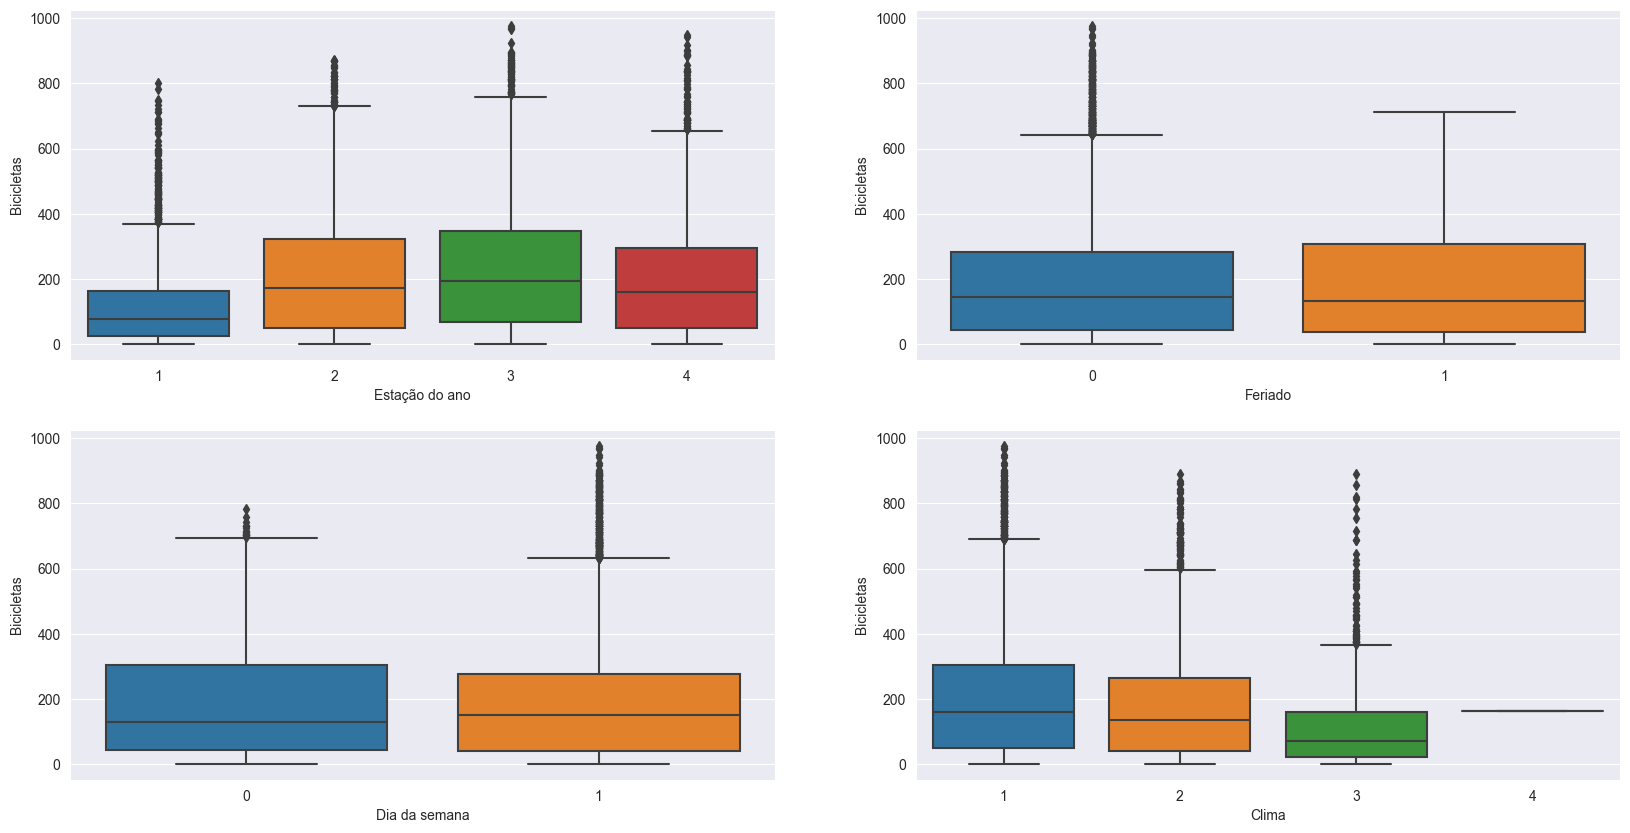

In [10]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(20,10)

sns.boxplot(data = treino, y = 'count', x = 'season', ax = axes[0][0])
sns.boxplot(data = treino, y = 'count', x = 'holiday', ax = axes[0][1])
sns.boxplot(data = treino, y = 'count', x = 'workingday', ax = axes[1][0])
sns.boxplot(data = treino, y = 'count', x = 'weather', ax = axes[1][1])

axes[0][0].set(xlabel = 'Estação do ano', ylabel = 'Bicicletas')
axes[0][1].set(xlabel = 'Feriado', ylabel = 'Bicicletas')
axes[1][0].set(xlabel = 'Dia da semana', ylabel = 'Bicicletas')
axes[1][1].set(xlabel = 'Clima', ylabel = 'Bicicletas')

C:\Users\lucas\AppData\Local\Temp\ipykernel_11688\3857174818.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(treino.corr('pearson'), vmin = -1, vmax = 1, cmap = 'BuPu', annot = True, square = True)


<AxesSubplot: >

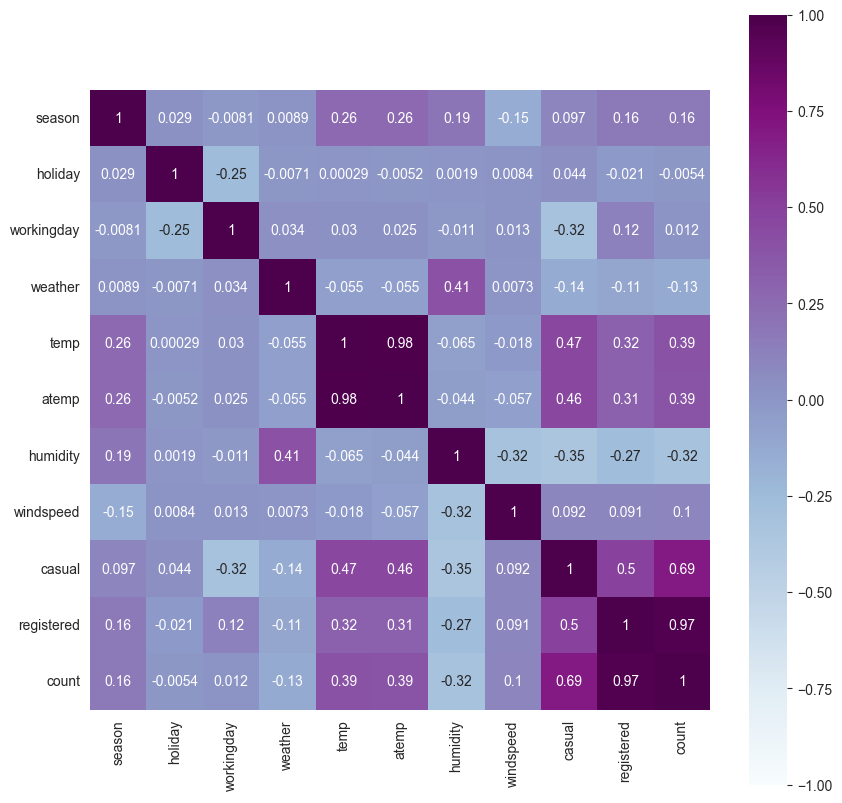

In [11]:
plt.figure(figsize = (10,10))
sns.heatmap(treino.corr('pearson'), vmin = -1, vmax = 1, cmap = 'BuPu', annot = True, square = True)

In [12]:
treino['datetime'] = pd.to_datetime(treino['datetime'])
teste['datetime'] = pd.to_datetime(teste['datetime'])

treino.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
def separa_data(df):    # Formata a data, para ser mais fácil de manipular
    df['year'] = df['datetime'].apply(lambda t:t.year)
    df['month'] = df['datetime'].apply(lambda t:t.month)
    df['day'] = df['datetime'].apply(lambda t:t.day)
    df['dayofweek'] = df['datetime'].apply(lambda t:t.dayofweek)
    df['hour'] = df['datetime'].apply(lambda t:t.hour)
    df = df.drop(['datetime'], axis = 1)
    return df

In [14]:
treino = separa_data(treino)
teste = separa_data(teste)
treino = treino.drop(['casual', 'registered'], axis = 1) #Retira as colunas 'casual' e 'registered', visto que quando somados obtemos a coluna 'count' não influenciando no objetivo final

treino.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,5,4


<AxesSubplot: xlabel='month', ylabel='count'>

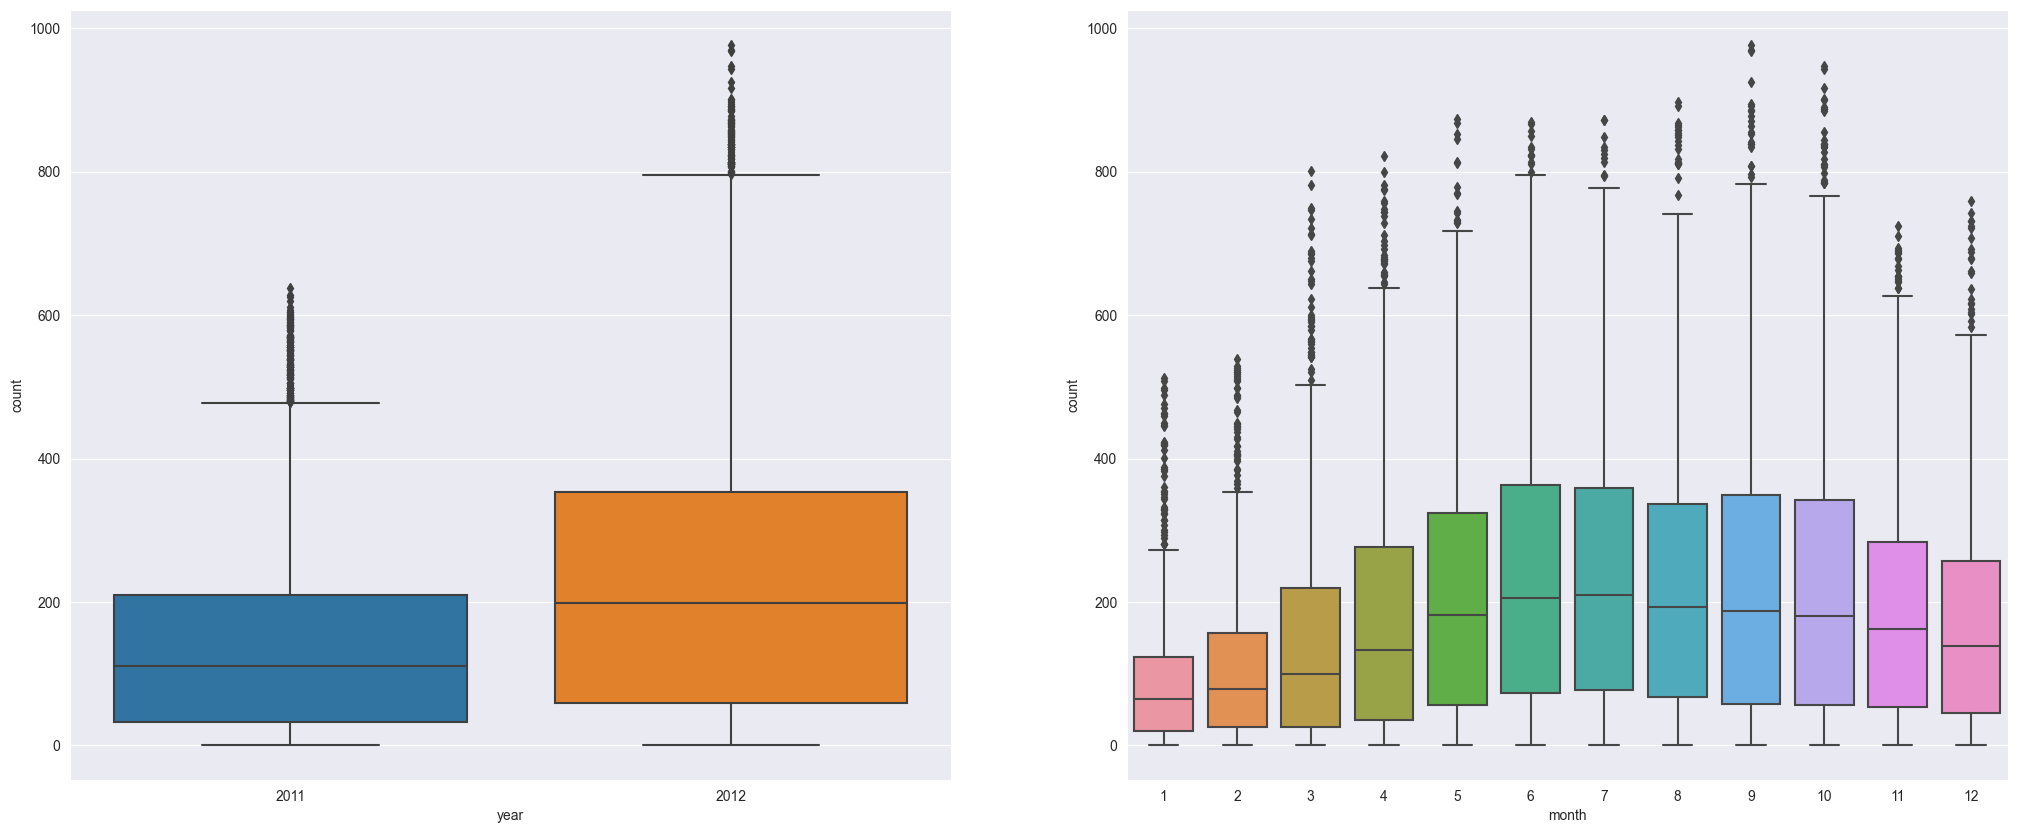

In [15]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(25, 10)
sns.boxplot(data = treino, x = 'year', y = 'count', ax=axes[0])
sns.boxplot(data = treino, x = 'month', y = 'count', ax=axes[1])


<AxesSubplot: xlabel='hour', ylabel='count'>

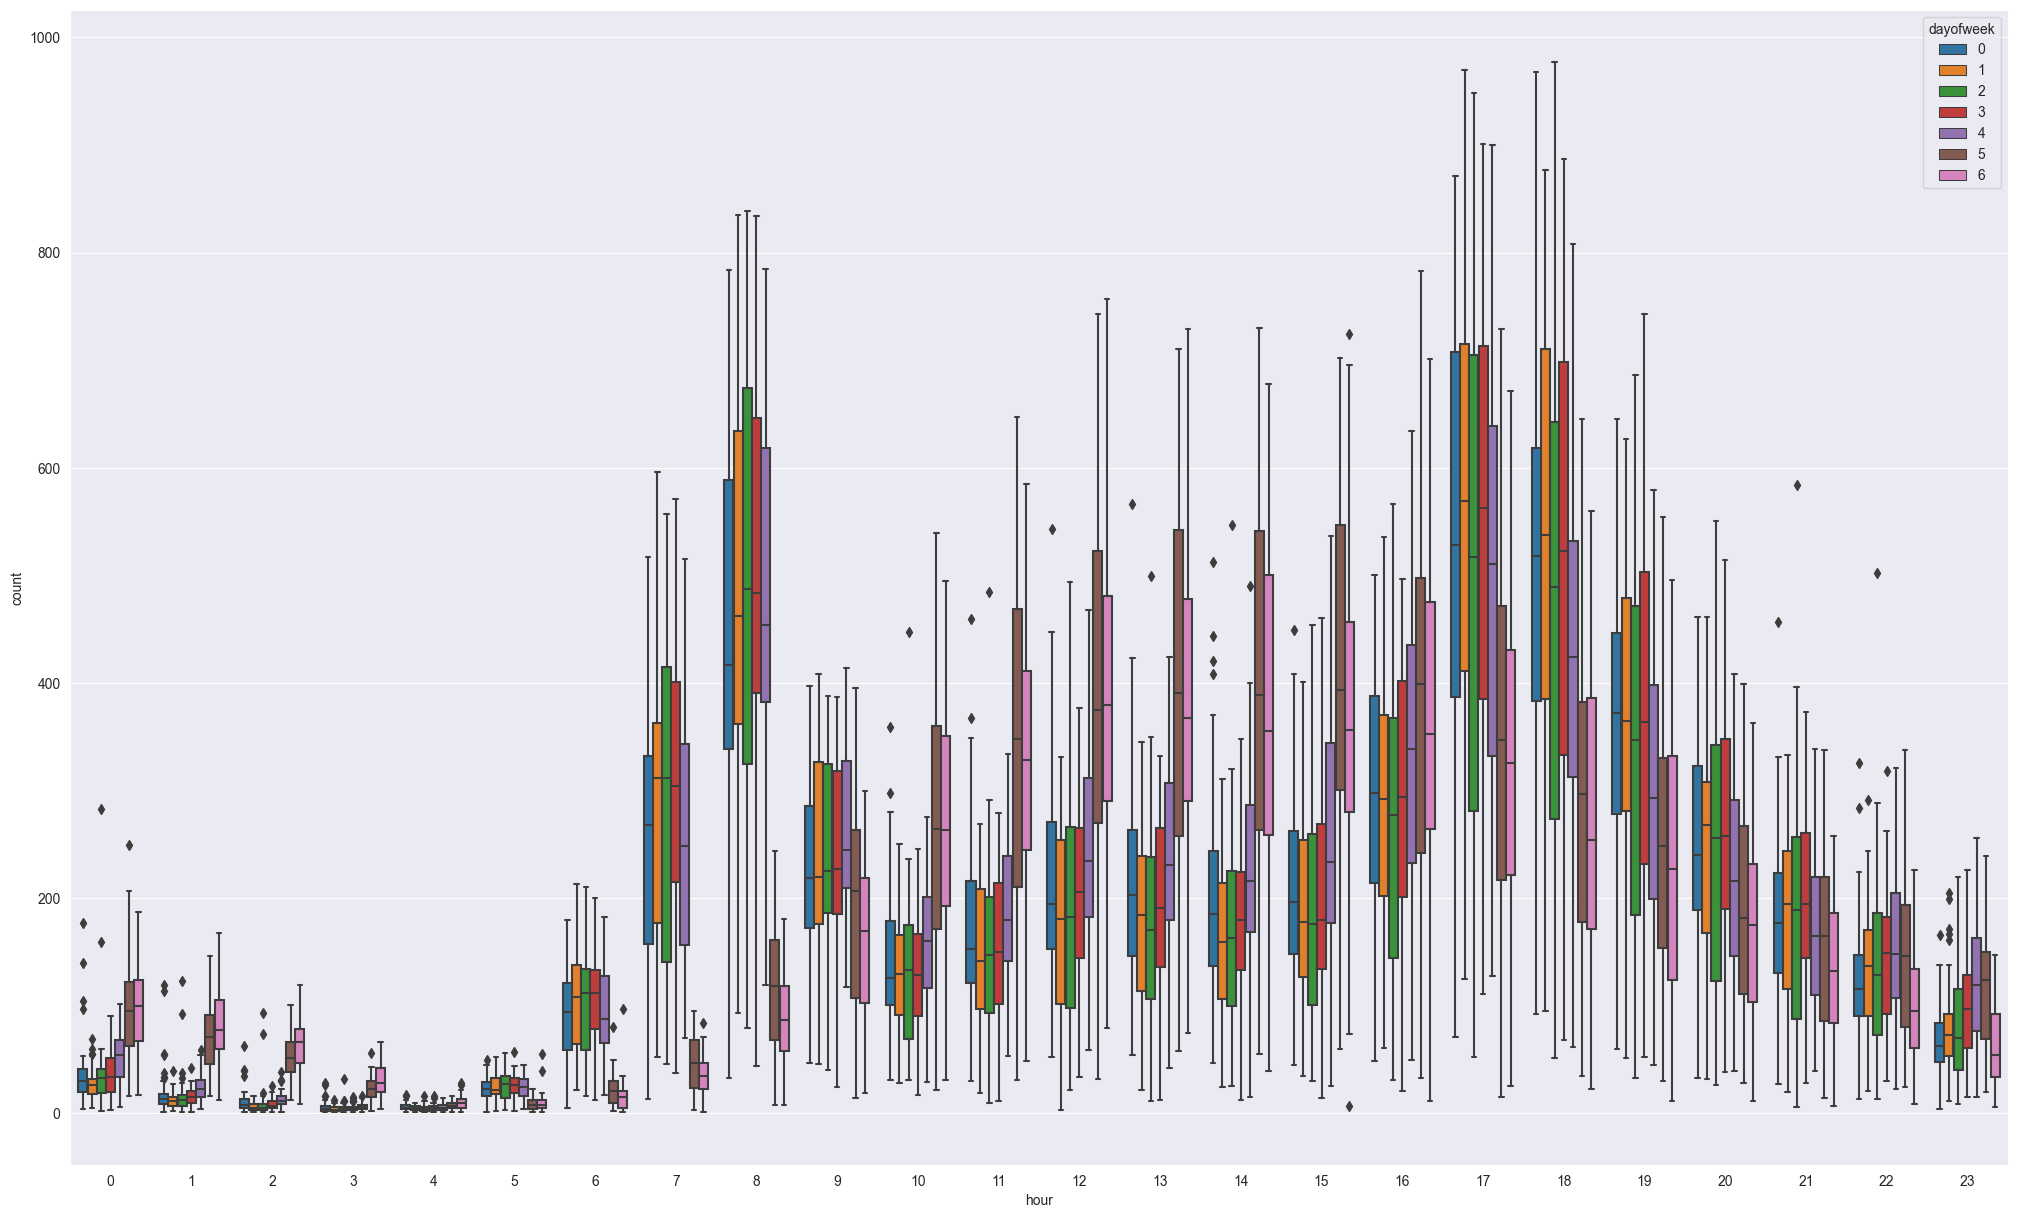

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(25, 15)
sns.boxplot(data = treino, x = 'hour', y = 'count', ax=axes, hue = 'dayofweek')


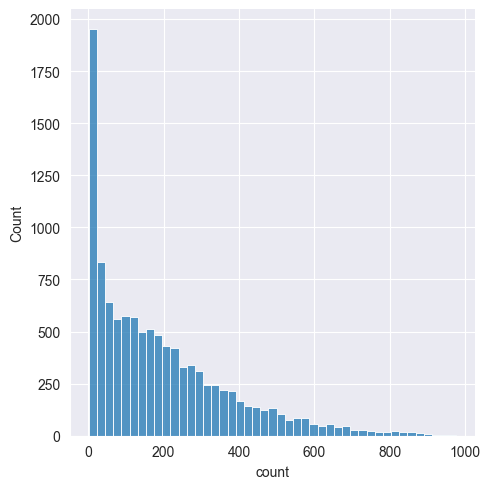

In [17]:
sns.displot(treino['count'])

In [18]:
treino['count'] = np.log1p(treino['count']) # Utilizando uma função log para que os resultados fossem diluidos, assim sendo mais facilmente manipulados

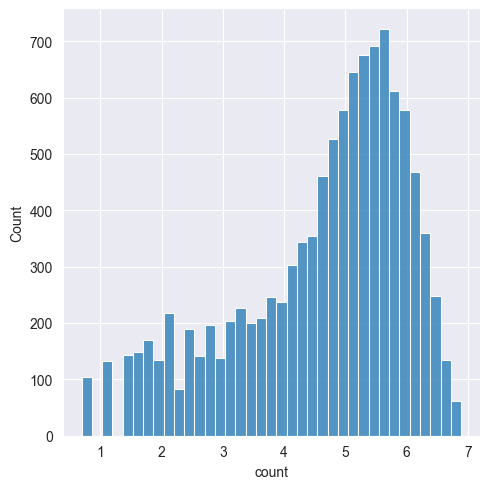

In [19]:
sns.displot(treino['count'])

In [20]:
treino = treino[np.abs(treino['count']) - treino["count"].mean() <= (3*treino['count'].std())] # Tentndo eliminar incoerências

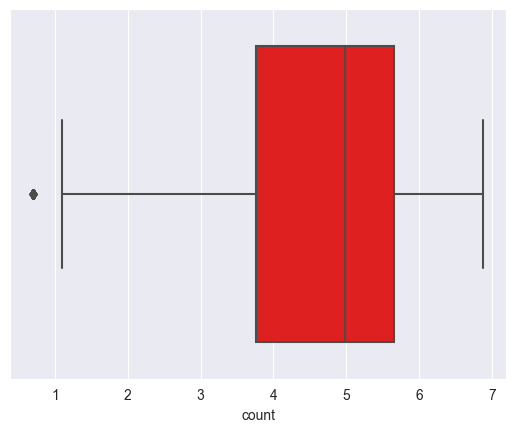

In [21]:
sns.boxplot(x = 'count', data = treino, color = 'red')
plt.show()

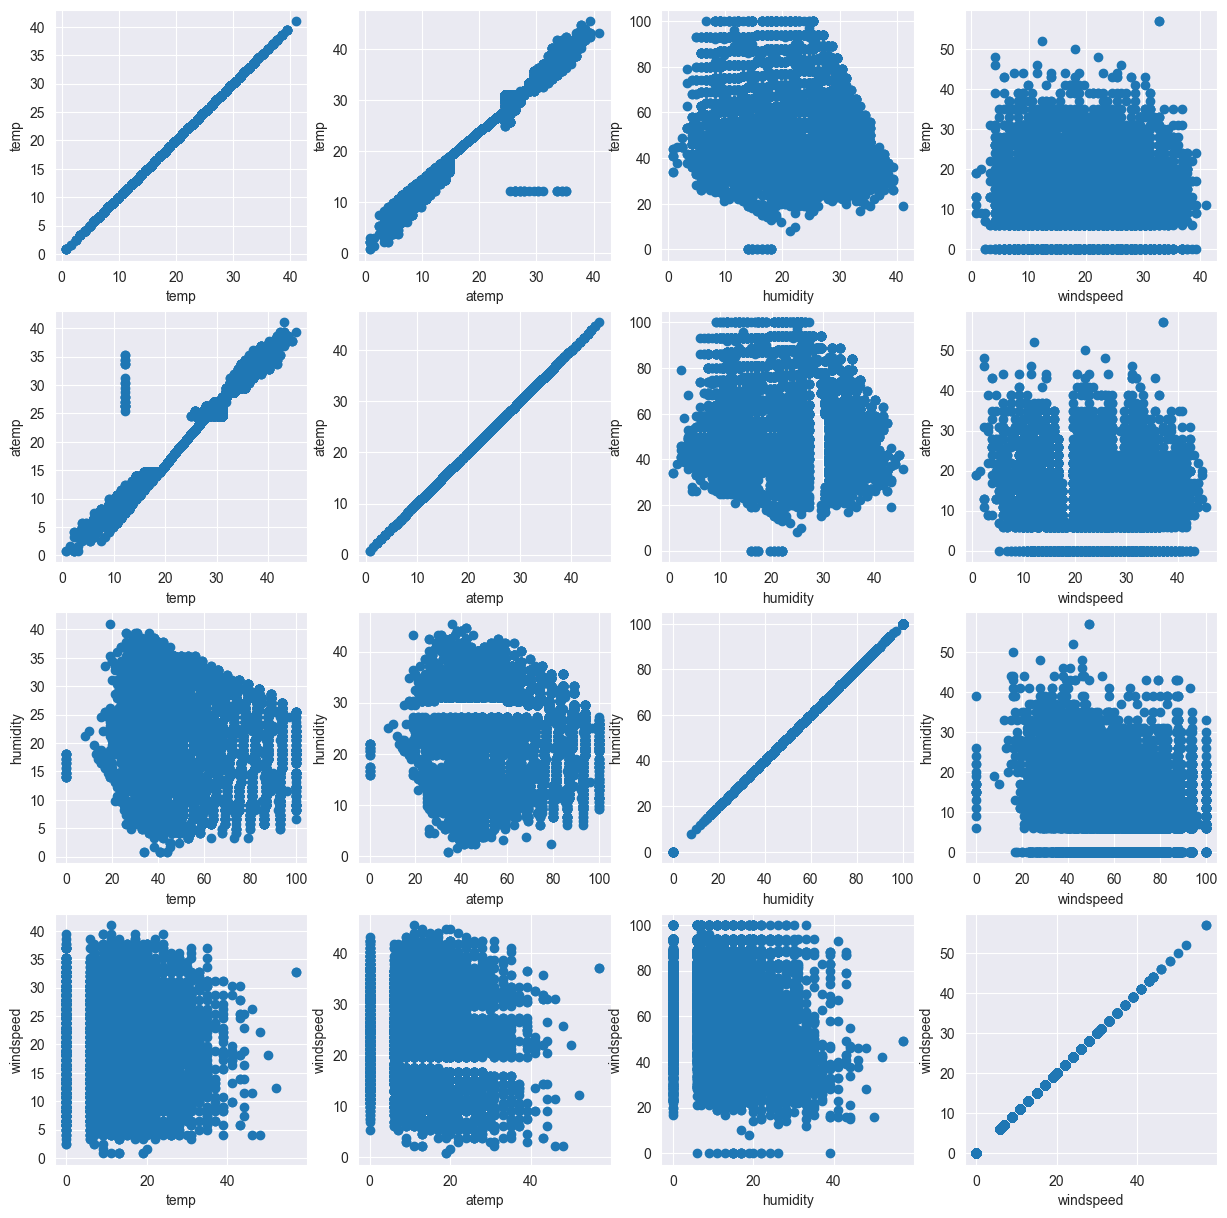

In [22]:
fig = plt.figure(figsize = (15, 15))

for i, f1 in enumerate(fields):
    for j, f2 in enumerate(fields):
        idx = i * len(fields) + j + 1
        ax = fig.add_subplot(len(fields), len(fields), idx)
        ax.scatter(treino[f1], treino[f2])
        ax.set_ylabel(f1)
        ax.set_xlabel(f2)
        
plt.show()

In [23]:
drop_idx = treino[(treino['temp'] > 20) & (treino['temp'] < 40) & (treino['atemp'] > 10) & (treino['atemp'] < 20)].index # Eliminando incoerência nos dados de teneoratura
treino = treino.drop(drop_idx)

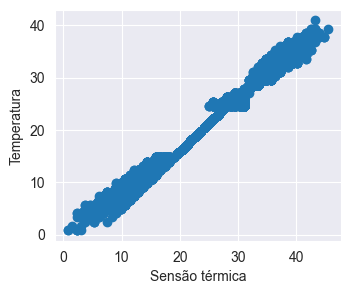

In [24]:
fig =plt.figure(figsize=(17,3))
ax = fig.add_subplot(1,4, 1)
ax.scatter(treino['atemp'], treino['temp'])
ax.set_ylabel('Temperatura')
ax.set_xlabel('Sensão térmica')

plt.show()

In [25]:
treino.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,2.833213,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,3.713572,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,3.496508,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,2.639057,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,0.693147,2011,1,1,5,4


In [26]:
from sklearn.preprocessing import MinMaxScaler

def escala(df):
    scaler = MinMaxScaler()
    num_cols = ['temp', 'atemp', 'humidity', 'windspeed']
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df

In [27]:
treino = escala(treino)
teste = escala(teste)
treino.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,0.224490,0.305068,0.81,0.0,2.833213,2011,1,1,5,0
1,1,0,0,1,0.204082,0.288064,0.80,0.0,3.713572,2011,1,1,5,1
2,1,0,0,1,0.204082,0.288064,0.80,0.0,3.496508,2011,1,1,5,2
3,1,0,0,1,0.224490,0.305068,0.75,0.0,2.639057,2011,1,1,5,3
4,1,0,0,1,0.224490,0.305068,0.75,0.0,0.693147,2011,1,1,5,4


In [28]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(treino.drop(['count'], axis=1), treino['count'], test_size=0.3)

In [29]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

In [30]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV

In [31]:
def avaliar(reg_cls, params=None):
    reg = reg_cls()
    if params:
        reg = GridSearchCV(reg, param_grid=params, refit=True)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    
    y_test_exp = np.expm1(y_test)
    pred_exp = np.expm1(pred)
    print('\n', reg_cls)
    if params:
        print(reg.best_params_)
        reg = reg.best_estimator_
    print(rmsle(y_test_exp, pred_exp))
    return reg, pred_exp

In [32]:
lr_reg, pred_lr = avaliar(LinearRegression)
rg_reg, pred_rg = avaliar(Ridge)
ls_reg, pred_ls = avaliar(Lasso)
rf_reg, pred_rf = avaliar(RandomForestRegressor)
gb_reg, pred_gb = avaliar(GradientBoostingRegressor)
xg_reg, pred_xg = avaliar(XGBRegressor)
lg_reg, pred_lg = avaliar(LGBMRegressor)

params = {'n_estimators': [100*i for i in range(1, 6)]}
xg_reg, pred_xg = avaliar(XGBRegressor, params)
lg_reg, pred_lg = avaliar(LGBMRegressor, params)


 <class 'sklearn.linear_model._base.LinearRegression'>
1.0015294890008208

 <class 'sklearn.linear_model._ridge.Ridge'>
1.0012225235817716

 <class 'sklearn.linear_model._coordinate_descent.Lasso'>
1.1661900514375145

 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
0.31669825129054224

 <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
0.38791897792059304

 <class 'xgboost.sklearn.XGBRegressor'>
0.29915375151542883

 <class 'lightgbm.sklearn.LGBMRegressor'>
0.29535500661400516

 <class 'xgboost.sklearn.XGBRegressor'>
{'n_estimators': 100}
0.29915375151542883

 <class 'lightgbm.sklearn.LGBMRegressor'>
{'n_estimators': 400}
0.28476153713899727


In [33]:
def feature_importances(reg):
    plt.figure(figsize=(20, 10))
    print(type(reg))
    df = pd.DataFrame(sorted(zip(X_train.columns, reg.feature_importances_)), columns=['Feature', 'Value'])
    sns.barplot(x="Value", y="Feature", data=df.sort_values(by="Value", ascending=False))
    plt.show()

<class 'xgboost.sklearn.XGBRegressor'>


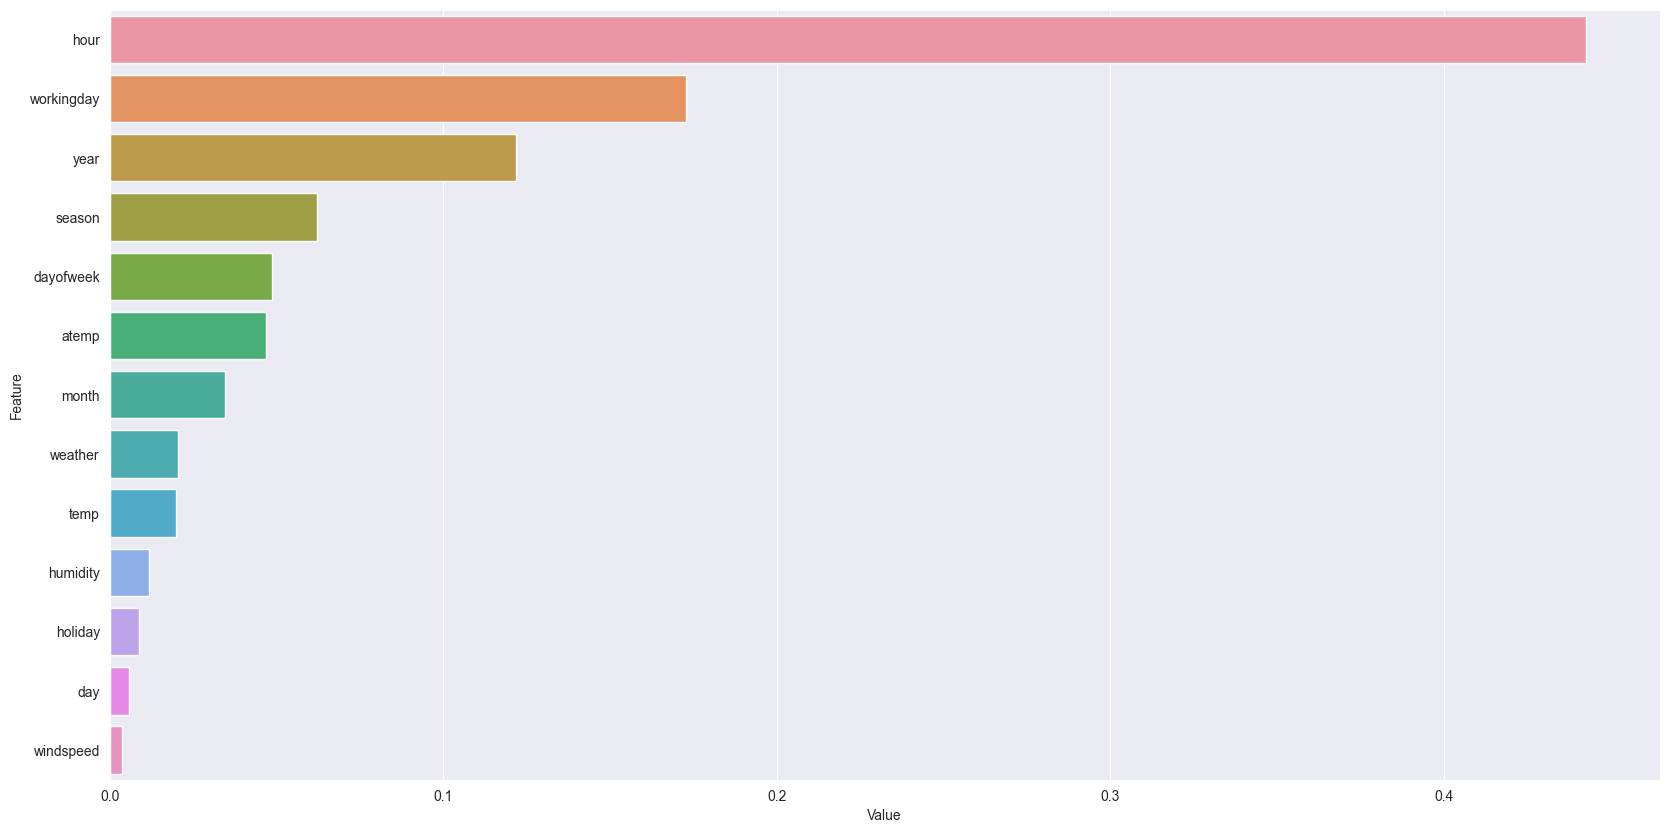

In [34]:
feature_importances(xg_reg)

<class 'lightgbm.sklearn.LGBMRegressor'>


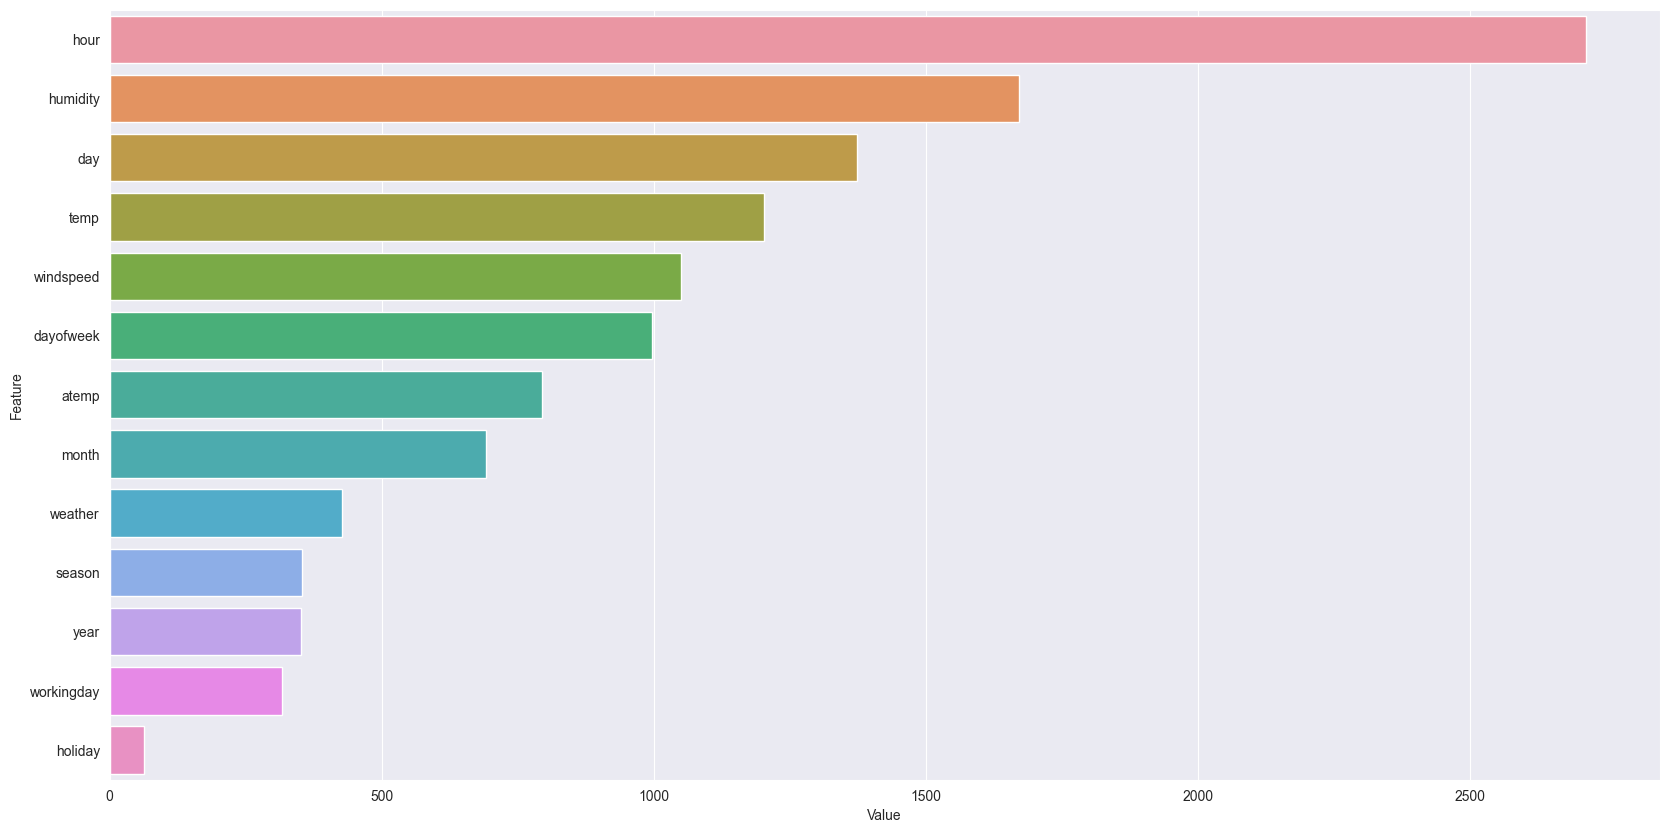

In [35]:
feature_importances(lg_reg)

In [36]:
resultado = pd.read_csv("content/sampleSubmission.csv")
resultado

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [37]:
teste.shape

(6493, 13)

In [38]:
previsao = lg_reg.predict(teste)
previsao_exp = np.expm1(previsao)
print(previsao_exp)

[ 10.98333545   4.52374291   2.73771421 ... 130.18321696  84.37459824
  52.7466007 ]


In [39]:
resultado.loc[:, 'count'] = previsao_exp
resultado

,datetime,count
0,2011-01-20 00:00:00,10.983335
1,2011-01-20 01:00:00,4.523743
2,2011-01-20 02:00:00,2.737714
3,2011-01-20 03:00:00,2.271199
4,2011-01-20 04:00:00,1.935032
...,...,...
6488,2012-12-31 19:00:00,266.088875
6489,2012-12-31 20:00:00,164.636083
6490,2012-12-31 21:00:00,130.183217
6491,2012-12-31 22:00:00,84.374598


In [40]:
teste.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,0.25,0.2273,0.47619,0.464346,2011,1,20,3,0
1,1,0,1,1,0.25,0.2727,0.47619,0.000000,2011,1,20,3,1
2,1,0,1,1,0.25,0.2727,0.47619,0.000000,2011,1,20,3,2
3,1,0,1,1,0.25,0.2576,0.47619,0.196458,2011,1,20,3,3
4,1,0,1,1,0.25,0.2576,0.47619,0.196458,2011,1,20,3,4


In [41]:
resultado.head()

,datetime,count
0,2011-01-20 00:00:00,10.983335
1,2011-01-20 01:00:00,4.523743
2,2011-01-20 02:00:00,2.737714
3,2011-01-20 03:00:00,2.271199
4,2011-01-20 04:00:00,1.935032


In [42]:
resultado.to_csv('resultado.csv', index=False)